In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

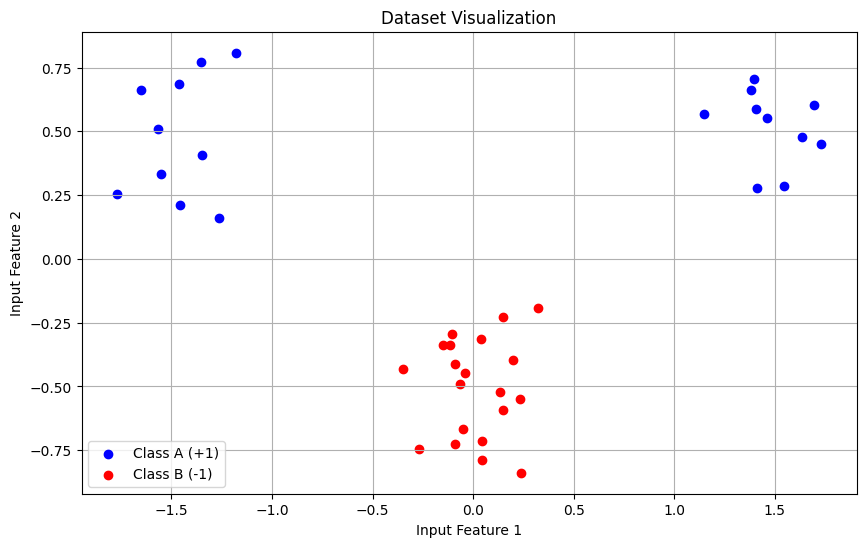

In [2]:
np.random.seed(100)
classA = np.concatenate((
    np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
    np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]
))

np.random.seed(100)
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs = np.concatenate((classA, classB))
targets = np.concatenate((
    np.ones(classA.shape[0]),
    -np.ones(classB.shape[0])
))

np.random.seed(100)
N = inputs.shape[0]  # Number of rows (samples)
permute = list(range(N))
random.shuffle(permute)

inputs = inputs[permute, :]
targets = targets[permute]

plt.figure(figsize=(10, 6))
plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], color='blue', label='Class A (+1)')
plt.scatter(inputs[targets == -1][:, 0], inputs[targets == -1][:, 1], color='red', label='Class B (-1)')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.title('Dataset Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
from tools import SupportVectorMachine

svm = SupportVectorMachine(X=inputs, y=targets, kernel_type='linear')

In [4]:
svm.fit()

array([0.00000000e+00, 2.13696113e-15, 4.27850074e-14, 1.12831314e+01,
       6.11176669e-15, 6.61465272e+00, 0.00000000e+00, 2.61984019e-14,
       4.12437685e-14, 2.10794970e-14, 2.39413796e-14, 8.26136012e-16,
       4.04471912e-14, 4.66847872e+00, 0.00000000e+00, 2.64212018e-14,
       2.43461061e-14, 4.19228059e-15, 3.66531717e-14, 7.91486668e-15,
       0.00000000e+00, 2.51487835e-14, 4.33798634e-16, 4.55330843e-14,
       2.43990388e-14, 0.00000000e+00, 2.93360079e-14, 6.31758374e-14,
       1.13958599e-14, 3.92893741e-15, 0.00000000e+00, 2.24841156e-14,
       8.30758157e-15, 2.88081635e-15, 0.00000000e+00, 3.94934628e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.82155926e-15])

In [5]:
y_preds = svm.predict(inputs)
y_preds

array([ 1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
        1,  1, -1, -1,  1,  1])

In [6]:
print(f"Accuracy rate: {svm.evaluate(y_preds, targets)}")

Accuracy rate: 1.0


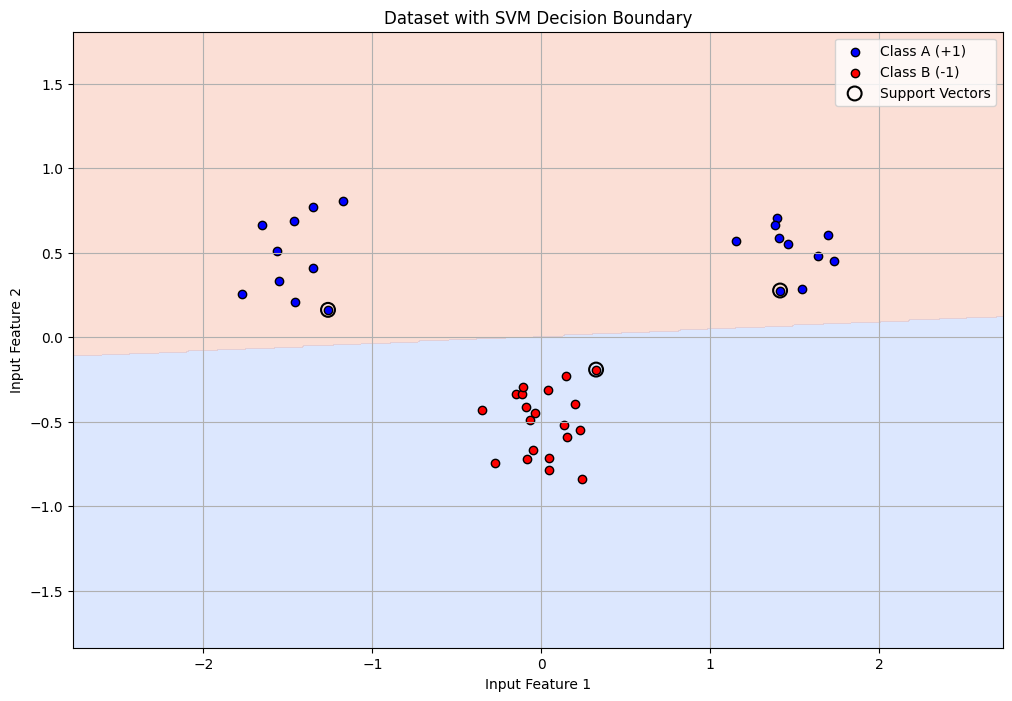

In [7]:
# Create a mesh grid for plotting the decision boundary
x_min, x_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
y_min, y_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict using the trained SVM model for each point on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = svm.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plotting the dataset and the decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(Z.min(), Z.max(), 3), cmap='coolwarm')
plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], color='blue', label='Class A (+1)', edgecolor='k')
plt.scatter(inputs[targets == -1][:, 0], inputs[targets == -1][:, 1], color='red', label='Class B (-1)', edgecolor='k')

# Highlight support vectors
plt.scatter(svm.X[svm.nonzero_alphas][:, 0], svm.X[svm.nonzero_alphas][:, 1], 
            s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.title('Dataset with SVM Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()
